In [2]:
import pandas
import matplotlib.pyplot as plt

In [3]:
model_results = pandas.read_excel('ModelResults.xlsx')
model_results.head(5)

,Atlas,Window,Dynamic_length,Signal,Inverted,Accuracy,Precision,Recall,ROC,Subject (if applicable)
0,sphere15mm,30,30,HbT,True,0.6250,0.750000,0.375,0.625000,1
1,sphere15mm,30,30,HbT,False,0.5000,0.500000,0.250,0.531250,1
2,sphere15mm,30,30,HbR,True,0.5625,0.555556,0.625,0.437500,1
3,sphere15mm,30,30,HbR,False,0.3750,0.250000,0.125,0.296875,1
4,sphere15mm,30,30,HbO,True,0.5000,0.500000,0.375,0.468750,1


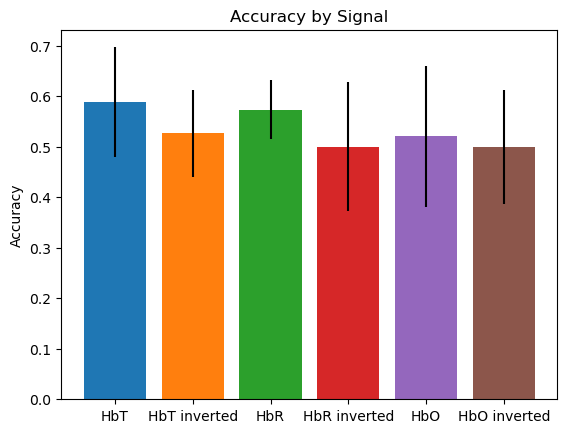

In [4]:
#plot the data by signal and invert

for signal in model_results['Signal'].unique():
    signal_data = model_results[model_results['Signal'] == signal]
    pos_Data = signal_data[signal_data['Inverted'] == True]
    neg_Data = signal_data[signal_data['Inverted'] == False]
    avg_pos = pos_Data['Accuracy'].mean()
    avg_neg = neg_Data['Accuracy'].mean()
    plt.bar(signal, avg_pos, yerr=pos_Data['Accuracy'].std())
    plt.bar(signal + " inverted", avg_neg, yerr=neg_Data['Accuracy'].std())
plt.ylabel('Accuracy')
plt.title('Accuracy by Signal')
plt.show()

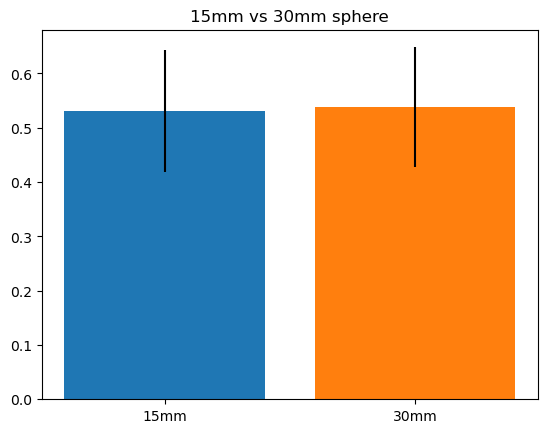

In [5]:
#compare 15 and 30 mm sphere

sphere15 = model_results[model_results['Atlas'] == 'sphere15mm']
sphere30 = model_results[model_results['Atlas'] == 'sphere30mm']

plt.bar('15mm', sphere15['Accuracy'].mean(), yerr=sphere15['Accuracy'].std())
plt.bar('30mm', sphere30['Accuracy'].mean(), yerr=sphere30['Accuracy'].std())
plt.title('15mm vs 30mm sphere')
plt.show()

